In [1]:
import matplotlib
import pandas as pd
import numpy as np
import csv

In [2]:
# Load the data into a DataFrame
df = pd.read_csv('magnetization_16x16.csv')
#sort the frame to be in ascending temp order

df = df.sort_values('Temperature', ascending=True)
df = df.reset_index(drop=True)

In [3]:
df

,Temperature,Magnetization
0,1.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,1.5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,2.0,"[-0.734375, -0.734375, -0.734375, -0.734375, -..."
3,2.5,"[0.0546875, 0.0546875, 0.046875, 0.046875, 0.0..."
4,3.0,"[-0.4453125, -0.453125, -0.453125, -0.453125, ..."
5,3.5,"[0.25, 0.2421875, 0.234375, 0.2421875, 0.23437..."
6,4.0,"[-0.0390625, -0.046875, -0.0546875, -0.0546875..."
7,4.5,"[0.2265625, 0.2265625, 0.21875, 0.2265625, 0.2..."


In [4]:
df['Magnetization'] =df['Magnetization'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

In [5]:
import matplotlib.pyplot as plt

In [6]:
print(df.index.size)

8


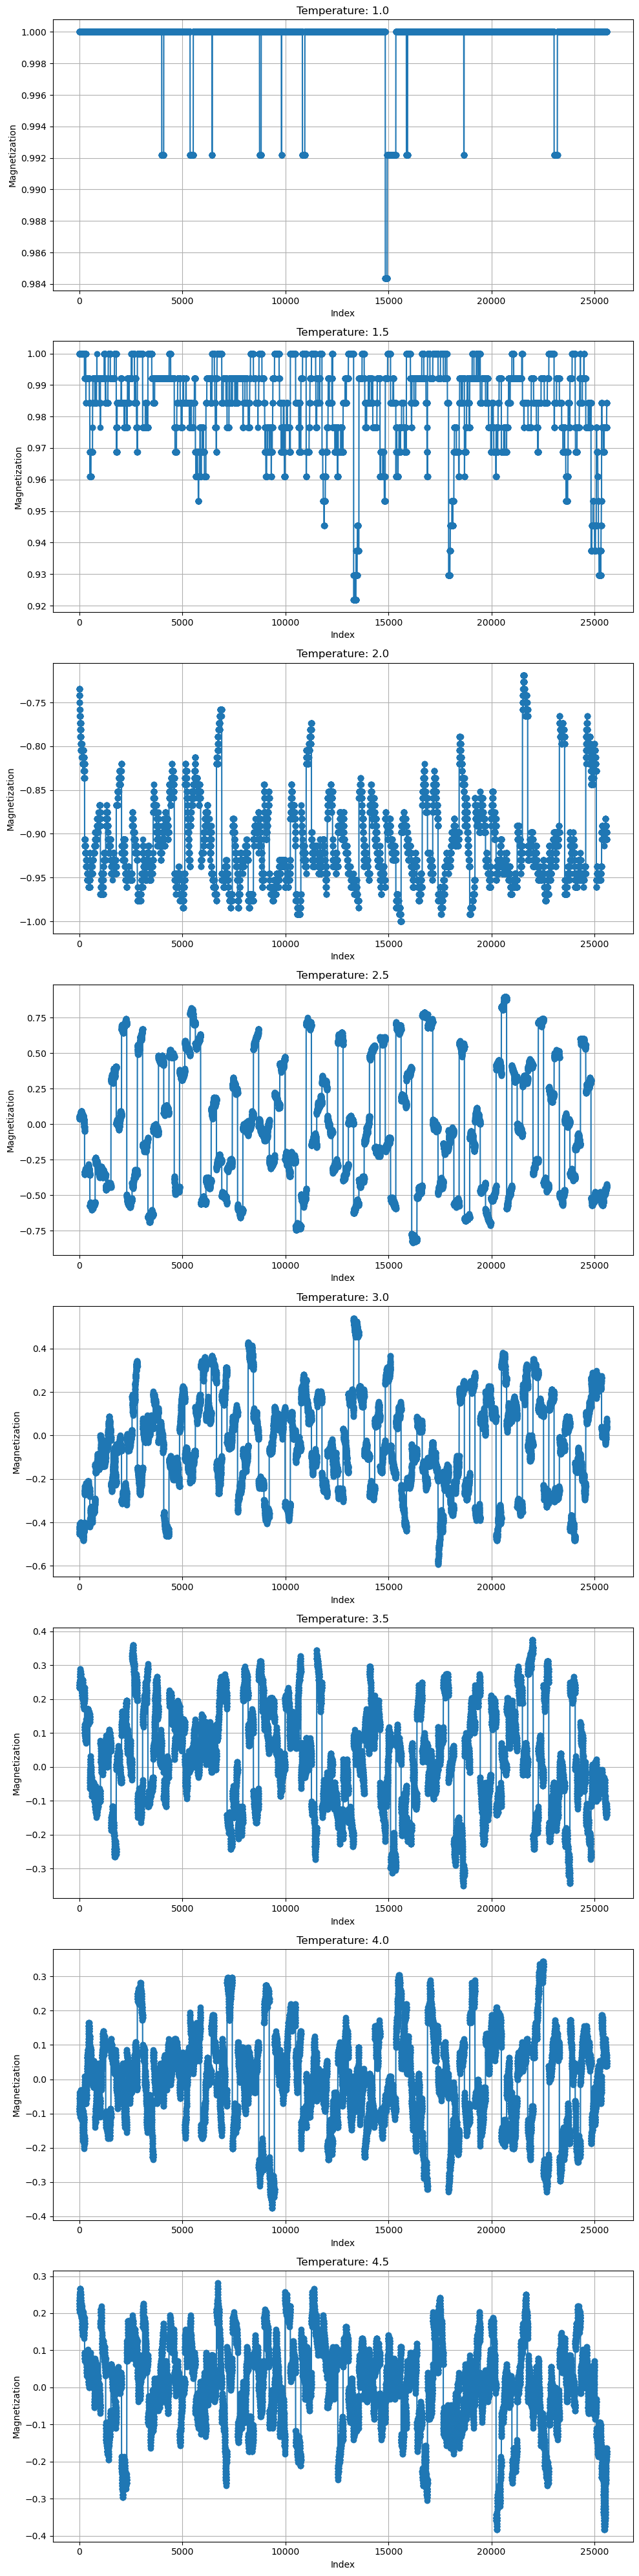

In [7]:
fig, axs = plt.subplots(df.index.size, figsize=(10, 40))  # Create 8 subplots

# Loop over each row in the dataframe
for i, row in df.iterrows():
    # Plot the Magnetization values against their indices
    axs[i].plot(range(len(row['Magnetization'])), row['Magnetization'], marker='o')
    axs[i].set_title(f'Temperature: {row["Temperature"]}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Magnetization')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [8]:
# Calculate the absolute average magnetization for each temperature
df['Average_Magnetization'] = df['Magnetization'].apply(lambda x: np.mean(np.abs(x)))

In [9]:
df['Average_Magnetization']

0    0.999603
1    0.984616
2    0.911751
3    0.377903
4    0.179608
5    0.121713
6    0.102745
7    0.088841
Name: Average_Magnetization, dtype: float64

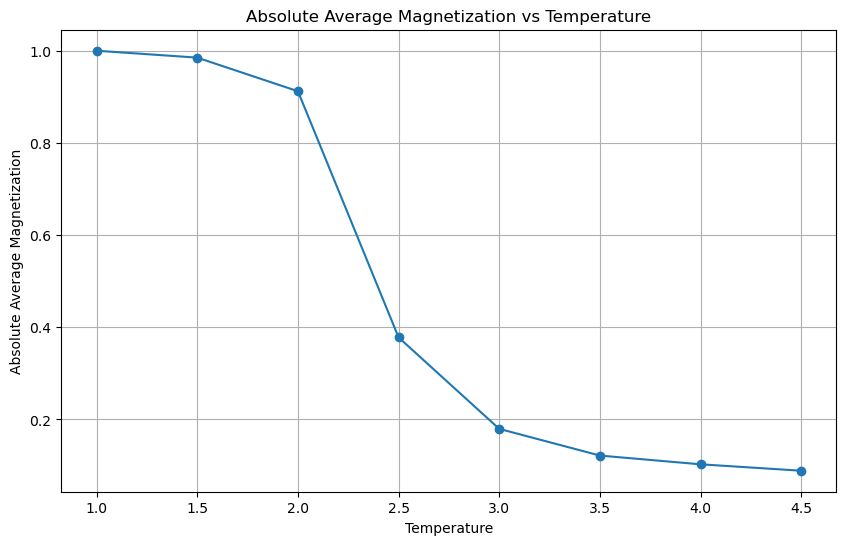

In [10]:
# Plot the absolute average magnetization vs temperature
plt.figure(figsize=(10, 6))
plt.plot(df['Temperature'], df['Average_Magnetization'], marker='o')
plt.title('Absolute Average Magnetization vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Absolute Average Magnetization')
plt.grid(True)
plt.show()
